In [1]:
import pandas as pd
import numpy as np

# Read dataset

In [2]:
path = "~/Dropbox/Mi Mac (MacBook Air de Biel)/Desktop/1. Master/1. Assignatures/MVA/A1. Assignment 1/"
data = pd.read_csv(path + "euroleague_23_24.csv", delimiter=';')

# 1. First do the exploratory data analysis.



## a) Discard the variable “No” from the data set. (1p)

In [3]:
data = data.drop(columns="No")

## b) Split variable “Min” using strsplit() function. Give the name “aux” to the output. The first element of each row will show the minutes that the player played in total. (1p)


In [4]:
aux = data["Min"].str.split(":", n = 2, expand = True)
aux = aux.astype({0: 'int64'})
aux = aux.astype({1: 'int64'})

data["Min"] = aux[0]*60 + aux[1]

## c) Add a numerical variable to the data set named “Min 2” which shows on average how many minutes each player played in the game. (2p)


In [5]:
data["Min2"] = data["Min"]/data["GP"]

## d) Check the structure of the data and assign correct type to each variable considering whether it is a categorical or numerical variable. (2p)


In [6]:
data = data.astype({'PTS': 'string', '2P%': 'string', '3P%': 'string', 'FT%': 'string', 'OR': 'string', 'DR': 'string', 'TR': 'string', 'AST': 'string', 'STL': 'string', 'BLK': 'string', 'TO': 'string', 'BLKA': 'string', 'FC': 'string', 'FD': 'string', 'PIR': 'string'})

data["PTS"] = data["PTS"].str.replace(',', '.').astype(float)
data["2P%"] = data["2P%"].str.replace(',', '.').astype(float)
data["3P%"] = data["3P%"].str.replace(',', '.').astype(float)
data["FT%"] = data["FT%"].str.replace(',', '.').astype(float)
data["OR"] = data["OR"].str.replace(',', '.').astype(float)
data["DR"] = data["DR"].str.replace(',', '.').astype(float)
data["TR"] = data["TR"].str.replace(',', '.').astype(float)
data["AST"] = data["AST"].str.replace(',', '.').astype(float)
data["STL"] = data["STL"].str.replace(',', '.').astype(float)
data["TO"] = data["TO"].str.replace(',', '.').astype(float)
data["BLK"] = data["BLK"].str.replace(',', '.').astype(float)
data["BLKA"] = data["BLKA"].str.replace(',', '.').astype(float)
data["FC"] = data["FC"].str.replace(',', '.').astype(float)
data["FD"] = data["FD"].str.replace(',', '.').astype(float)
data["PIR"] = data["PIR"].str.replace(',', '.').astype(float)

data = data.astype({'TEAM ': 'category', 'PLAYER': 'category', 'POSITION': 'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   TEAM      64 non-null     category
 1   PLAYER    64 non-null     category
 2   POSITION  64 non-null     category
 3   GP        64 non-null     int64   
 4   GS        64 non-null     int64   
 5   Min       64 non-null     int64   
 6   PTS       64 non-null     float64 
 7   2P%       64 non-null     float64 
 8   3P%       64 non-null     float64 
 9   FT%       64 non-null     float64 
 10  OR        64 non-null     float64 
 11  DR        64 non-null     float64 
 12  TR        64 non-null     float64 
 13  AST       64 non-null     float64 
 14  STL       64 non-null     float64 
 15  TO        64 non-null     float64 
 16  BLK       64 non-null     float64 
 17  BLKA      64 non-null     float64 
 18  FC        64 non-null     float64 
 19  FD        64 non-null     float64 
 20  PIR       64

 # 2. Application of PCA


## a) Apply PCA on all the scaled numerical variables in the data set by using PCA() function in FactoMineR package. Treat the categorical variables and the variable “PIR” as suplemantary variables using arguments quali.sup and quanti.sup correctly. (3p)


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [8]:
data_pca = data.drop(columns=data.select_dtypes(include=['category']).columns)
data_pca = data_pca.drop(columns="Min2")

scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data_pca)

## b) How many components should be extracted? Decide on the number of components considering eigenvalues. (3p)


In [9]:
import matplotlib.pyplot as plt

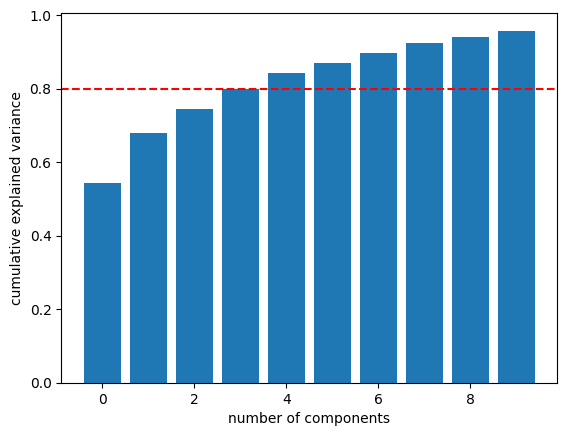

In [10]:
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(len(explained_variance_ratio_cumsum)), explained_variance_ratio_cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

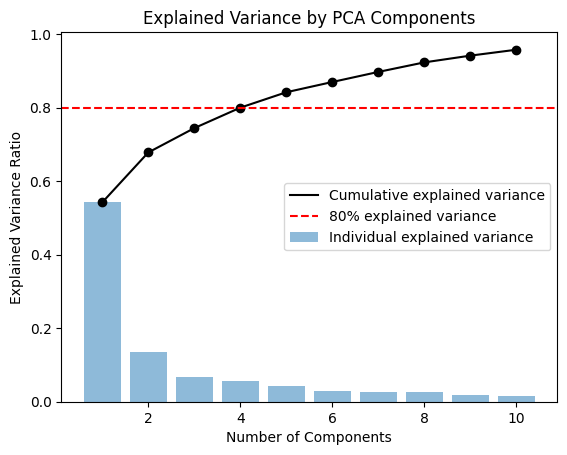

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.bar(range(1,len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')

plt.plot(range(1,len(explained_variance_ratio_cumsum)+1), explained_variance_ratio_cumsum, label='Cumulative explained variance', color='black')

plt.scatter(range(1,len(explained_variance_ratio_cumsum)+1), explained_variance_ratio_cumsum, color='black')

plt.axhline(y=0.8, color='red', linestyle='--', label='80% explained variance')

plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

#  llegenda
plt.legend(loc='best')

plt.show()



## c) Interpret the loadings/correlations of variables at each dimension (3p).

In [12]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], 
                        index=data.drop(columns=data.select_dtypes(include=['category']).columns).drop(columns="Min2").columns)
print(loadings)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
GP    0.267321 -0.077794  0.221818  0.041532 -0.128416  0.179755 -0.228494   
GS    0.245411 -0.058356 -0.071797 -0.007362 -0.319058 -0.360421 -0.189259   
Min   0.306151 -0.093223  0.027106  0.057574 -0.063919 -0.157640 -0.095938   
PTS   0.291880 -0.100651 -0.091654  0.141935  0.189948 -0.065960  0.088385   
2P%   0.143113  0.214362  0.572526 -0.111937  0.227343 -0.171370  0.590744   
3P%   0.029152 -0.305200  0.064662  0.827211  0.012696  0.261923  0.228593   
FT%   0.189193 -0.079824  0.577275 -0.025389  0.279305 -0.035413 -0.324339   
OR    0.206838  0.430283 -0.108220  0.102478 -0.061581  0.048695 -0.023016   
DR    0.279718  0.169162 -0.057164  0.179140 -0.046543 -0.231998 -0.113708   
TR    0.271256  0.276597 -0.077118  0.163463 -0.059696 -0.140588 -0.089790   
AST   0.191971 -0.365740 -0.058851 -0.256719 -0.317381  0.151445  0.358335   
STL   0.230311 -0.263054  0.055147 -0.051988 -0.265889 -0.156231

## d) Use plot.PCA() function to show correlations between variables and the extracted dimensions. (For the variables you should use the argument choix = “var”). Plot all the extracted dimensions changing argument “axes”.(3p)


In [13]:
import plotly.express as px


In [20]:
fig = px.scatter_matrix(
    principalComponents,
    dimensions=range(4),
    color=data["TEAM "],
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [24]:
fig = px.scatter(principalComponents, x=0, y=1, color=data["TEAM "])  
fig.show()

fig = px.scatter(principalComponents, x=0, y=1, color=data["POSITION"])
fig.show()      

TypeError: scatter() got an unexpected keyword argument 'shape'

In [30]:
features = data.drop(columns=data.select_dtypes(include=['category']).columns).drop(columns="Min2").columns

fig = px.scatter(principalComponents, x=0, y=1, color=data['POSITION'])
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x= loadings[i, 0],
        y= loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

# 3. Application of MDS.


## a) Apply metric MDS using Euclidean distance on scaled numerical variables. (2p)

In [32]:
from sklearn.manifold import MDS


In [35]:
# keep numerical variables
data_mds = data.drop(columns=data.select_dtypes(include=['category']).columns)

mds = MDS(n_components=2)
X_trans = mds.fit_transform(data_mds)
print(X_trans)

[[ 593.48681217  102.84779971]
 [  65.34057476  -17.94811406]
 [ 318.6297109    57.08815152]
 [ 819.81970105  -26.54934875]
 [ 500.09903969   53.6581666 ]
 [-613.97269182  -26.47689078]
 [ 888.78267534   42.26166356]
 [ -64.78498101   13.19620028]
 [-695.29726566  -19.10427389]
 [-687.82956247   -4.03529588]
 [-819.54833187  -54.34963446]
 [ 524.20250914   55.5233782 ]
 [-522.60815061  -24.24863842]
 [ -23.53326574   -8.44044325]
 [-729.07579031  -25.35375506]
 [ 527.2627599   -20.17816337]
 [  48.10782266  -31.94762042]
 [ 783.0767829    45.73269201]
 [  37.70007385   -8.44833836]
 [ 191.27735429   -8.89933623]
 [-557.83464908  -12.68698933]
 [ 681.19917371  144.91295908]
 [-438.11046648  -18.14900193]
 [ 433.52160897   10.92172342]
 [  50.47361205  -21.35838241]
 [-312.50667848  -23.19854922]
 [-140.54562685  -28.61899686]
 [-413.57332954   20.46615406]
 [-121.65252672  -22.38348618]
 [-455.59468784   -1.10771684]
 [ 290.96214816    4.99096351]
 [-301.39329965   -3.58601069]
 [-624.7

In [41]:
plot = px.scatter(X_trans[:,0], X_trans[:,1],color = data["POSITION"],title = "MDS")
plot.show()

In [43]:
from sklearn.metrics.pairwise import manhattan_distances

In [44]:

dist_manhattan = manhattan_distances(data_mds)
mds = MDS(n_components=2, dissimilarity = 'precomputed')

x_trans2 = mds.fit_transform(dist_manhattan)
plot = px.scatter(x_trans2[:,0], x_trans2[:,1],color = data["POSITION"],title = "MDS Manhattan")
plot.show()
